# Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url=('Data/stock_prices.csv')
df=pd.read_csv(url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1258 non-null   object 
 1   Closing Price  1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


,Date,Closing Price
0,2010-01-04,30.950001
1,2010-01-05,30.959999
2,2010-01-06,30.770000
3,2010-01-07,30.450001
4,2010-01-08,30.660000


In [3]:
df['datetime']=pd.to_datetime(df['Date'])
df.head()

,Date,Closing Price,datetime
0,2010-01-04,30.950001,2010-01-04
1,2010-01-05,30.959999,2010-01-05
2,2010-01-06,30.770000,2010-01-06
3,2010-01-07,30.450001,2010-01-07
4,2010-01-08,30.660000,2010-01-08


In [4]:
df=df.set_index('datetime')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2010-01-04 to 2014-12-31
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1258 non-null   object 
 1   Closing Price  1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.5+ KB


,Date,Closing Price
datetime,,
2010-01-04,2010-01-04,30.950001
2010-01-05,2010-01-05,30.959999
2010-01-06,2010-01-06,30.770000
2010-01-07,2010-01-07,30.450001
2010-01-08,2010-01-08,30.660000


In [5]:
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-22',
               '2014-12-23', '2014-12-24', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='datetime', length=1258, freq=None)

In [6]:
df=df.resample("B").asfreq()
df.head()

,Date,Closing Price
datetime,,
2010-01-04,2010-01-04,30.950001
2010-01-05,2010-01-05,30.959999
2010-01-06,2010-01-06,30.770000
2010-01-07,2010-01-07,30.450001
2010-01-08,2010-01-08,30.660000


In [7]:
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2014-12-18', '2014-12-19', '2014-12-22', '2014-12-23',
               '2014-12-24', '2014-12-25', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='datetime', length=1303, freq='B')

In [8]:
df.isna().sum()

Date             45
Closing Price    45
dtype: int64

## use foward fill to fill na,('ffill')

In [9]:
df=df.fillna(method='ffill')
df.isna().sum()

Date             0
Closing Price    0
dtype: int64

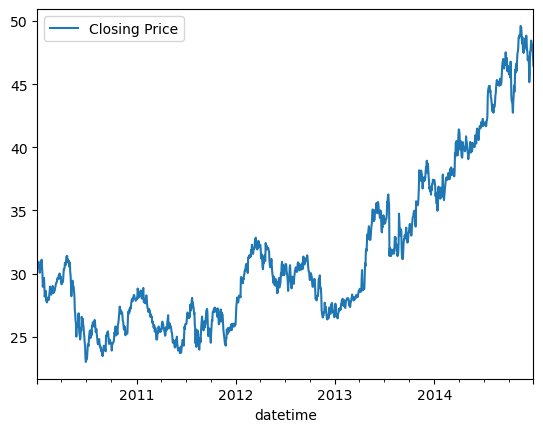

In [10]:
df.plot();

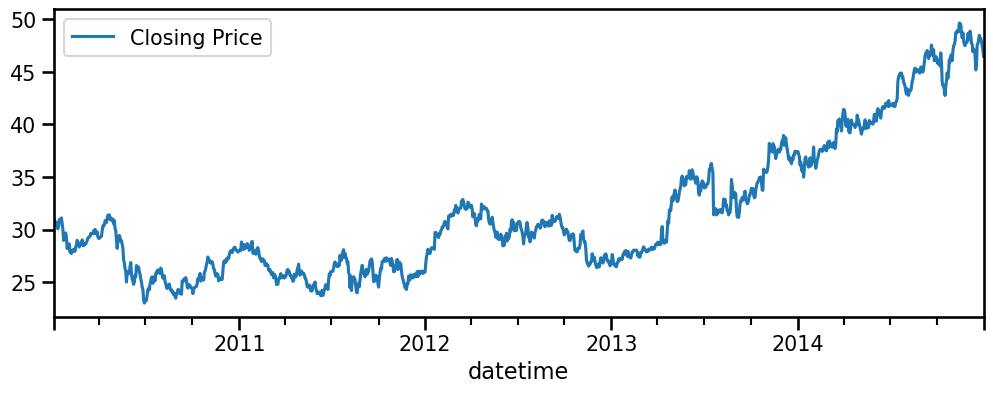

In [11]:
#Adjust fig size with rcParams
plt.rcParams["figure.figsize"]=(12,4)
#Use sns.set_context to add adjustments with 'talk' graph
sns.set_context('talk',font_scale=.9)
df.plot();

### New import for ad fuller test
    - Do it step by step

In [12]:
import statsmodels.tsa.api as tsa

In [13]:
df=df.drop(columns='Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1303 entries, 2010-01-04 to 2014-12-31
Freq: B
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Price  1303 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


In [14]:
tsa.adfuller(df)

(-0.10328975885959345,
 0.9491098733454186,
 0,
 1302,
 {'1%': -3.4353824418821852,
  '5%': -2.863762408248617,
  '10%': -2.567953223847985},
 1479.4448341309435)

In [15]:
#saving each output separately
(test_stat,pval,nlags,nobs,crit_vals_d,icbest)=tsa.adfuller(df)

In [16]:
#Saving the most important results as a dict
adfuller_results={'Test Statistic': test_stat,
                 '# of Lags Used': nlags,
                 '# of Observations': nobs,
                 'p_value': round(pval,6)}
adfuller_results

{'Test Statistic': -0.10328975885959345,
 '# of Lags Used': 0,
 '# of Observations': 1302,
 'p_value': 0.94911}

In [17]:
# Adding interpertation of p-value to dict
alpha=.05
adfuller_results['sig/stationary?']=pval<alpha
adfuller_results

{'Test Statistic': -0.10328975885959345,
 '# of Lags Used': 0,
 '# of Observations': 1302,
 'p_value': 0.94911,
 'sig/stationary?': False}

In [18]:
##convert dict of results to a dataframe
adfull_df=pd.DataFrame(adfuller_results,index=["Ad Fuller Test"])
adfull_df

,Test Statistic,# of Lags Used,# of Observations,p_value,sig/stationary?
Ad Fuller Test,-0.10329,0,1302,0.94911,False


### Getting adfuller results with function

In [19]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])



In [20]:
adfuller_result=get_adfuller_results(df,label='Microsoft')
adfuller_result

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
Microsoft,-0.10329,0,1302,0.94911,0.05,False


### Data is False for Stationary
    - Need to check for autocorrelation

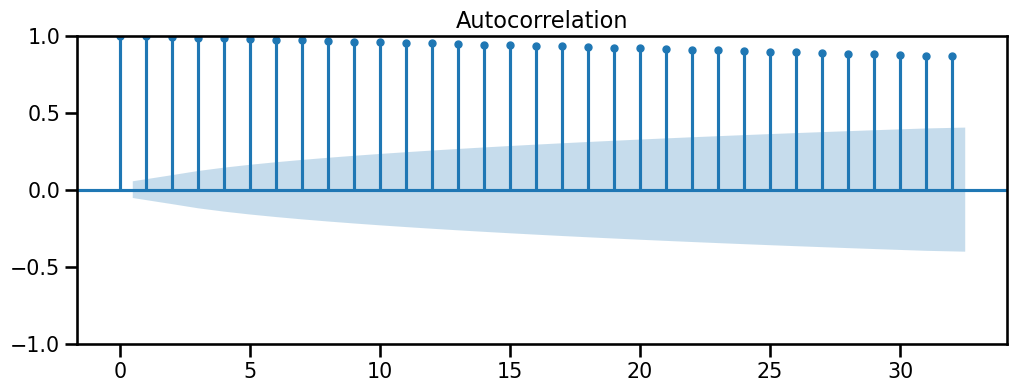

In [21]:
fig=tsa.graphics.plot_acf(df);

## Difference

In [22]:
df.head()

,Closing Price
datetime,
2010-01-04,30.950001
2010-01-05,30.959999
2010-01-06,30.770000
2010-01-07,30.450001
2010-01-08,30.660000


In [23]:
dfd=df.diff()
dfd.head()

,Closing Price
datetime,
2010-01-04,NaN
2010-01-05,0.009998
2010-01-06,-0.189999
2010-01-07,-0.320000
2010-01-08,0.209999


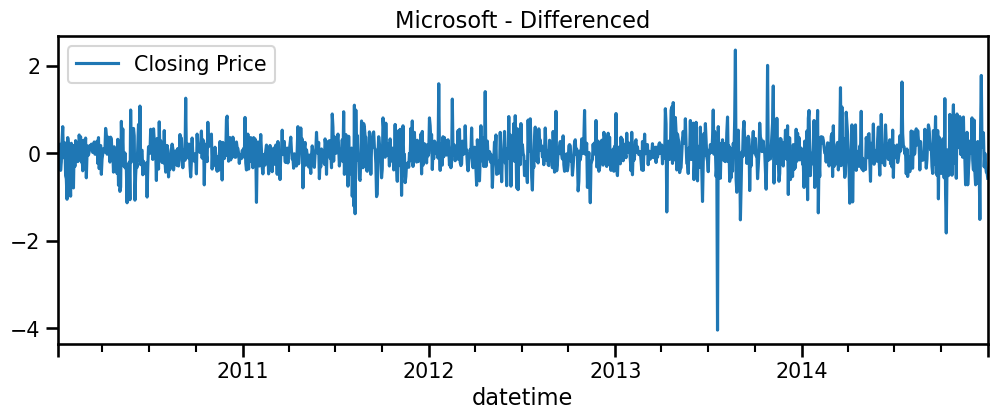

In [26]:
dfd=dfd.dropna()
dfd.plot(title='Microsoft - Differenced');

In [28]:
dfd_adfuller_results=get_adfuller_results(dfd,label="Microsoft-Differenced")
dfd_adfuller_results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
Microsoft-Differenced,-35.778578,0,1301,0.0,0.05,True


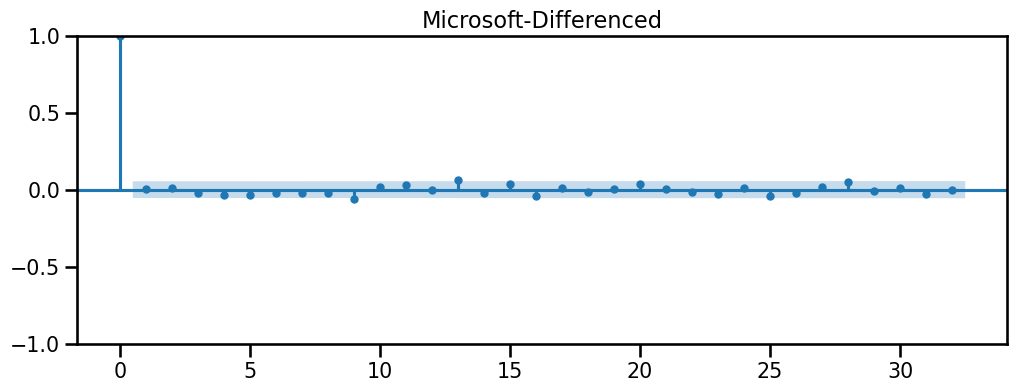

In [30]:
fig=tsa.graphics.plot_acf(dfd, title='Microsoft-Differenced');